# Problem 1
(5 pts): Generate a GIF for one of the following state evolutions. Proof to be provided is the solved quantum state per state evolution (applying a gate to a previous state) and its respective quantum circuit:

$$\Psi\rangle=HZH|0\rangle$$
$$\Psi\rangle = HYH|1\rangle$$
$$\Psi\rangle = XHZ|+\rangle$$

In [21]:
# Dependencies

%pip install qiskit
%pip install qiskit-aer
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

In [23]:
# Convert Statevector → (x,y,z)
def to_bloch_coords(vec):
    vec = np.asarray(vec)   
    alpha, beta = vec
    x = 2 * np.real(np.conj(alpha)*beta)
    y = 2 * np.imag(np.conj(alpha)*beta)
    z = np.abs(alpha)**2 - np.abs(beta)**2
    return [x, y, z]

In [24]:
# Build circuit
sim = AerSimulator(method="statevector")

# Step 0: |0>
qc0 = QuantumCircuit(1)
qc0.save_statevector()

# Step 1: H|0>
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.save_statevector()

# Step 2: ZH|0>
qc2 = QuantumCircuit(1)
qc2.h(0)
qc2.z(0)
qc2.save_statevector()

# Step 3: HZH|0> = |1>
qc3 = QuantumCircuit(1)
qc3.h(0)
qc3.z(0)
qc3.h(0)
qc3.save_statevector()

circuits = [qc0, qc1, qc2, qc3]
labels = ["|0⟩", "|+⟩", "|−⟩", "|1⟩"]

In [25]:
# Simulate states
bloch_vectors = []

for c in circuits:
    compiled = transpile(c, sim)
    result = sim.run(compiled).result()
    statevec = result.get_statevector()
    bloch_vectors.append(to_bloch_coords(statevec))

GIF saved as state_evolution.gif


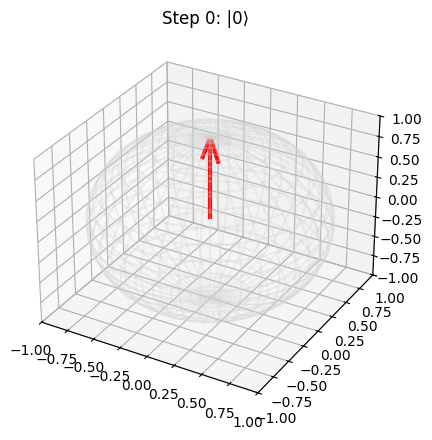

In [26]:
# Create GIF animation
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

def update(frame):
    ax.clear()
    ax.set_title(f"Step {frame}: {labels[frame]}")
    xv, yv, zv = bloch_vectors[frame]

    # Draw a Bloch sphere
    u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
    ax.plot_wireframe(np.cos(u)*np.sin(v),
                      np.sin(u)*np.sin(v),
                      np.cos(v),
                      color="lightgray", alpha=0.3)

    # Draw Bloch vector
    ax.quiver(0, 0, 0, xv, yv, zv, color="red", linewidth=3)

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])

    return ax

anim = FuncAnimation(fig, update, frames=len(bloch_vectors), interval=1500)

# SAVE GIF
anim.save("state_evolution.gif", writer=PillowWriter(fps=1))
print("GIF saved as state_evolution.gif")